In [1]:
#先引入后面可能用到的包（package）
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
#正常显示画图时出现的中文
from pylab import mpl
#这里使用微软雅黑字体
mpl.rcParams['font.sans-serif']=['SimHei']
#画图时显示负号
mpl.rcParams['axes.unicode_minus']=False
import seaborn as sns  #画图用的
import tushare as ts
#Jupyter Notebook特有的magic命令
#直接在行内显示图形
%matplotlib inline   

In [2]:
sh=ts.get_k_data(code='sh',ktype='D',
  autype='qfq', start='1990-12-20')
#code:股票代码，个股主要使用代码，如‘600000’
#ktype:'D':日数据；‘m’：月数据，‘Y’:年数据
#autype:复权选择，默认‘qfq’前复权
#start：起始时间
#end：默认当前时间
#查看下数据前5行
sh.head(5)

,date,open,close,high,low,volume,code
1,1990-12-20,113.1,113.5,113.5,112.85,1990.0,sh
2,1990-12-21,113.5,113.5,113.5,113.40,1190.0,sh
3,1990-12-24,113.5,114.0,114.0,113.30,8070.0,sh
4,1990-12-25,114.0,114.1,114.2,114.00,2780.0,sh
5,1990-12-26,114.4,114.3,114.4,114.20,310.0,sh


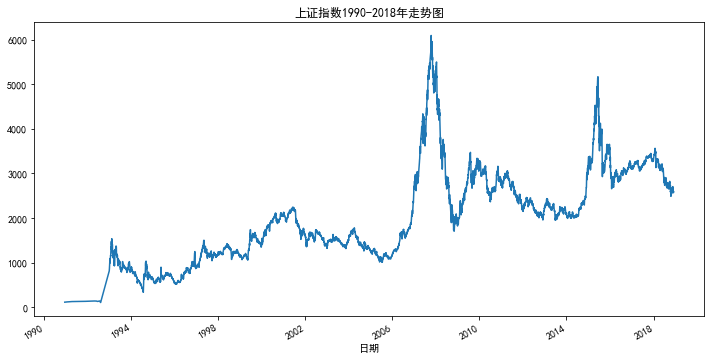

In [3]:
#将数据列表中的第0列'date'设置为索引
sh.index=pd.to_datetime(sh.date) 
#画出上证指数收盘价的走势
sh['close'].plot(figsize=(12,6))
plt.title('上证指数1990-2018年走势图')
plt.xlabel('日期')
plt.show()

In [4]:
#pandas的describe()函数提供了数据的描述性统计
#count:数据样本，mean:均值，std:标准差
sh.describe().round(2)

,open,close,high,low,volume
count,6662.00,6662.00,6662.00,6662.00,6.662000e+03
mean,1938.03,1939.27,1956.55,1918.08,7.046332e+07
std,1077.32,1078.69,1088.58,1064.61,1.019111e+08
min,105.50,105.50,105.50,105.50,1.000000e+01
25%,1175.64,1177.18,1187.76,1163.31,5.109257e+06
50%,1750.28,1747.48,1762.53,1730.50,2.071520e+07
75%,2741.36,2741.74,2769.00,2708.93,1.091663e+08
max,6057.43,6092.06,6124.04,6040.71,8.571328e+08


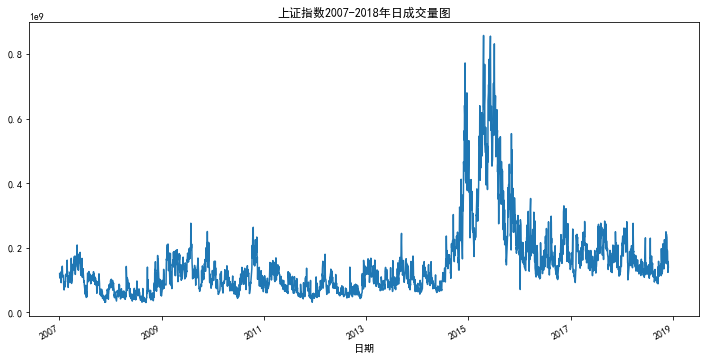

In [7]:
#再查看下每日成交量 
#2006年市场容量小，交易量比较小，我们从2007年开始看
sh.loc["2007-01-01":]["volume"].head(5)
sh.loc["2007-01-01":]["volume"].plot(figsize=(12,6))
plt.title('上证指数2007-2018年日成交量图')
plt.xlabel('日期')
plt.show()

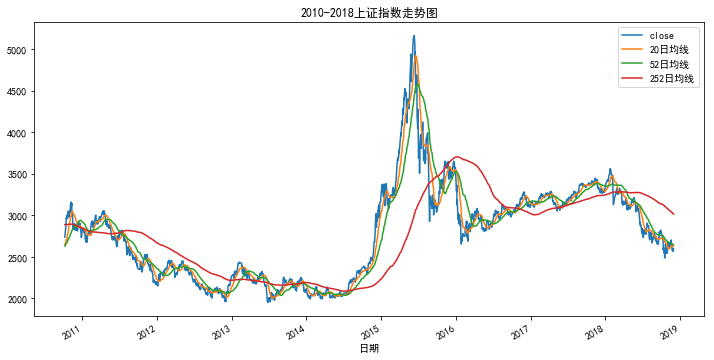

In [8]:
#这里的平均线是通过自定义函数，手动设置20,52,252日均线
#移动平均线：
ma_day = [20,52,252]

for ma in ma_day:
    column_name = "%s日均线" %(str(ma))
    sh[column_name] =sh["close"].rolling(ma).mean()
#sh.tail(3)
#画出2010年以来收盘价和均线图
sh.loc['2010-10-8':][["close",
"20日均线","52日均线","252日均线"]].plot(figsize=(12,6))
plt.title('2010-2018上证指数走势图')
plt.xlabel('日期')
plt.show()

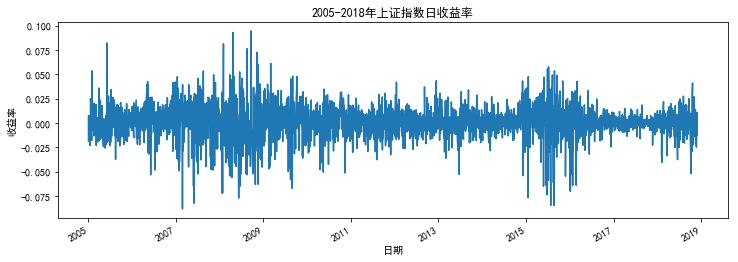

In [9]:
#2005年之前的数据噪音太大，主要分析2005年之后的
sh["日收益率"] = sh["close"].pct_change()
sh["日收益率"].loc['2005-01-01':].plot(figsize=(12,4))
plt.xlabel('日期')
plt.ylabel('收益率')
plt.title('2005-2018年上证指数日收益率')
plt.show()

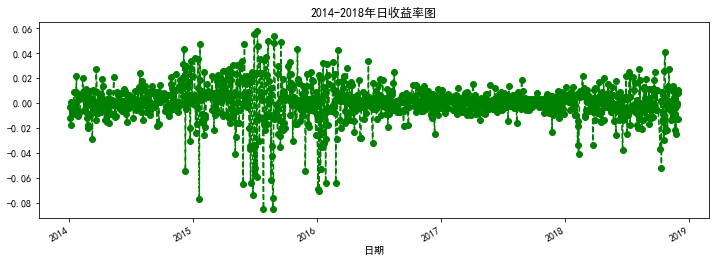

In [10]:
###这里我们改变一下线条的类型
#(linestyle)以及加一些标记(marker)
sh["日收益率"].loc['2014-01-01':].plot(figsize=
(12,4),linestyle="--",marker="o",color="g")
plt.title('2014-2018年日收益率图')
plt.xlabel('日期')
plt.show()

In [11]:
#分析下常见的几个股票指数
stocks={'上证指数':'sh','深证指数':'sz','沪深300':'hs300',
        '上证50':'sz50','中小板指':'zxb','创业板':'cyb'}
stock_index=pd.DataFrame()
for stock in stocks.values():
    stock_index[stock]=ts.get_k_data(stock,ktype='D', 
autype='qfq', start='2005-01-01')['close']
#stock_index.head()
#计算这些股票指数每日涨跌幅
tech_rets = stock_index.pct_change()[1:]
#tech_rets.head()
#收益率描述性统计
tech_rets.describe()
#结果不在此报告
#均值其实都大于0
tech_rets.mean()*100 #转换为%

sh       0.035328
sz       0.045189
hs300    0.049285
sz50     0.047496
zxb      0.010634
cyb      0.020986
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


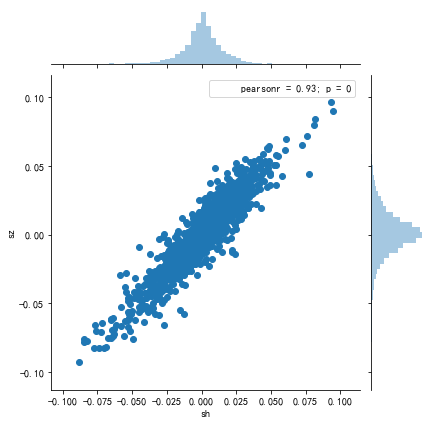

In [12]:
#jointplot这个函数可以画出两个指数的”相关性系数“，或者说皮尔森相关系数
sns.jointplot('sh','sz',data=tech_rets)

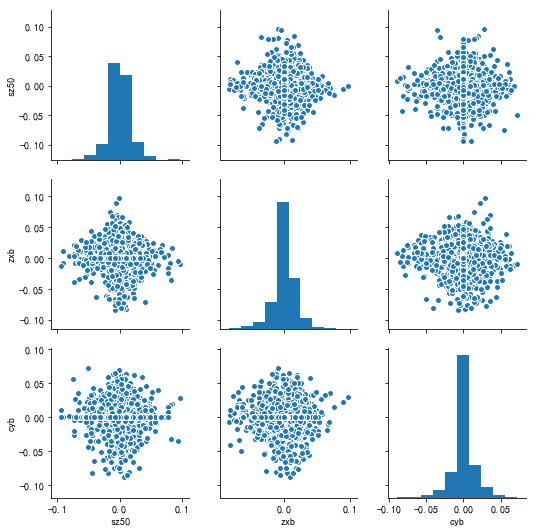

In [13]:
#成对的比较不同数据集之间的相关性，
#而对角线则会显示该数据集的直方图

sns.pairplot(tech_rets.iloc[:,3:].dropna())

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


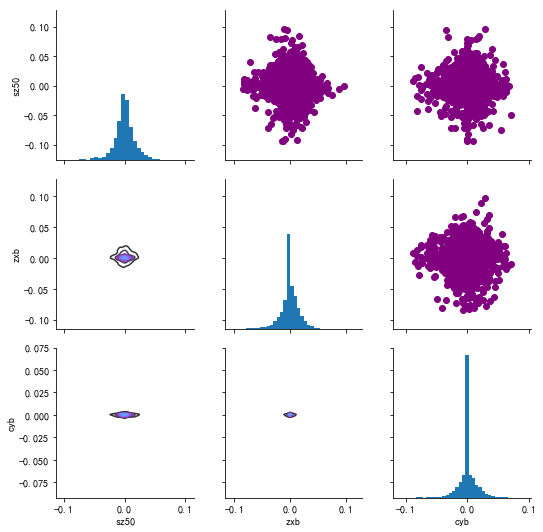

In [14]:
returns_fig = sns.PairGrid(tech_rets.iloc[:,3:].dropna())
###右上角画散点图
returns_fig.map_upper(plt.scatter,color="purple") 
###左下角画核密度图 
returns_fig.map_lower(sns.kdeplot,cmap="cool_d") 
###对角线的直方图 
returns_fig.map_diag(plt.hist,bins=30)

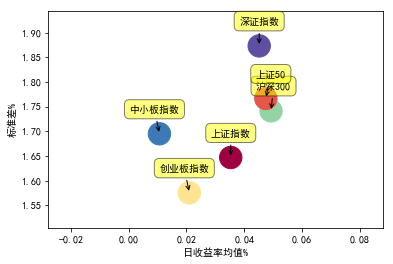

In [15]:
#构建一个计算股票收益率和标准差的函数
#默认起始时间为'2005-01-01'
def return_risk(stocks,startdate='2005-01-01'):
    close=pd.DataFrame()
    for stock in stocks.values():
        close[stock]=ts.get_k_data(stock,ktype='D', 
     autype='qfq', start=startdate)['close']
    tech_rets = close.pct_change()[1:]
    rets = tech_rets.dropna()
    ret_mean=rets.mean()*100
    ret_std=rets.std()*100
    return ret_mean,ret_std

#画图函数
def plot_return_risk():
    ret,vol=return_risk(stocks)
    color=np.array([ 0.18, 0.96, 0.75, 0.3, 0.9,0.5])
    plt.scatter(ret, vol, marker = 'o', 
    c=color,s = 500,cmap=plt.get_cmap('Spectral'))
    plt.xlabel("日收益率均值%")     
    plt.ylabel("标准差%")
    for label,x,y in zip(stocks.keys(),ret,vol):
        plt.annotate(label,xy = (x,y),xytext = (20,20),
            textcoords = "offset points",
             ha = "right",va = "bottom",
            bbox = dict(boxstyle = 'round,pad=0.5',
            fc = 'yellow', alpha = 0.5),
                arrowprops = dict(arrowstyle = "->",
                    connectionstyle = "arc3,rad=0"))
stocks={'上证指数':'sh','深证指数':'sz','沪深300':'hs300',
        '上证50':'sz50','中小板指数':'zxb','创业板指数':'cyb'}
plot_return_risk()

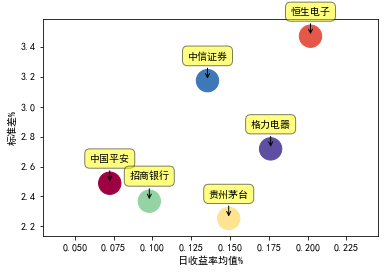

In [16]:
stocks={'中国平安':'601318','格力电器':'000651',
        '招商银行':'600036','恒生电子':'600570',
        '中信证券':'600030','贵州茅台':'600519'}
startdate='2018-01-01'
plot_return_risk()

In [17]:
df=ts.get_k_data('sh',ktype='D', autype='qfq', 
                 start='2005-01-01')
df.index=pd.to_datetime(df.date)
tech_rets = df.close.pct_change()[1:]
rets = tech_rets.dropna()
#rets.head()
#下面的结果说明，我们95%的置信，一天我们不会损失超过0.0264...
rets.quantile(0.05)

-0.026472863336271524

NameError: name 'Text' is not defined

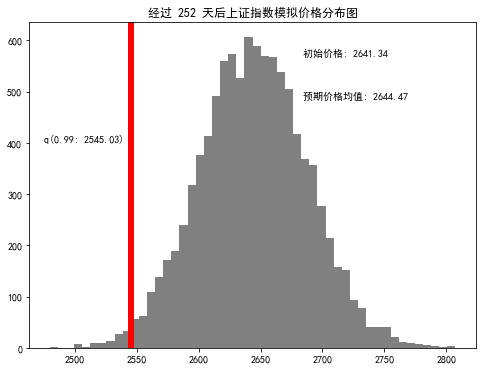

In [18]:
def monte_carlo(start_price,days,mu,sigma):
    dt=1/days
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu * dt,
                scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] *
                (drift[x] + shock[x]))
    return price
#模拟次数
runs = 10000
start_price = 2641.34 #今日收盘价
days = 252
mu=rets.mean()
sigma=rets.std()
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = monte_carlo(start_price,
      days,mu,sigma)[days-1]
q = np.percentile(simulations,1)
plt.figure(figsize=(8,6))
plt.hist(simulations,bins=50,color='grey')
plt.figtext(0.6,0.8,s="初始价格: %.2f" % start_price)
plt.figtext(0.6,0.7,"预期价格均值: %.2f" %simulations.mean())
plt.figtext(0.15,0.6,"q(0.99: %.2f)" %q)
plt.axvline(x=q,linewidth=6,color="r")
plt.title("经过 %s 天后上证指数模拟价格分布图" %days,weight="bold")
Text(0.5,1,'经过 252 天后上证指数模拟价格分布图')

经过250000次模拟，得出1年以后上证指数的预期平均收盘价为：2776.85


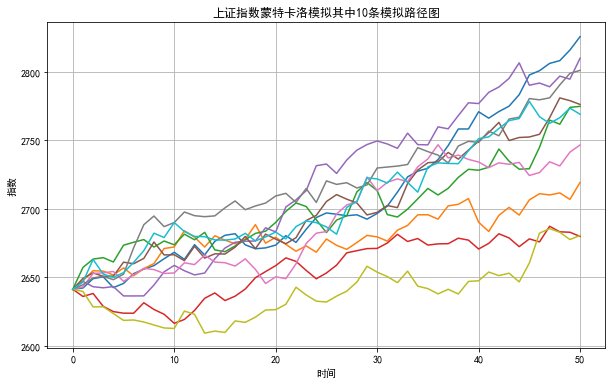

In [21]:
import numpy as np
from time import time
np.random.seed(2018)
t0=time()
S0=2641.34
T=1.0; 
r=0.05; 
sigma=rets.std()
M=50;
dt=T/M; 
I=250000
S=np.zeros((M+1,I))
S[0]=S0
for t in range(1,M+1):
    z=np.random.standard_normal(I)
    S[t]=S[t-1]*np.exp((r-0.5*sigma**2)*dt+
          sigma*np.sqrt(dt)*z)
s_m=np.sum(S[-1])/I
tnp1=time()-t0
print('经过250000次模拟，得出1年以后上证指数的预期平均收盘价为：%.2f'%s_m)
#经过250000次模拟，得出1年以后上证指数的预期平均收盘价为：2776.85
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(S[:,:10])
plt.grid(True)
plt.title('上证指数蒙特卡洛模拟其中10条模拟路径图')
plt.xlabel('时间')
plt.ylabel('指数')
plt.show()

Text(0.5,1,'上证指数蒙特卡洛模拟')

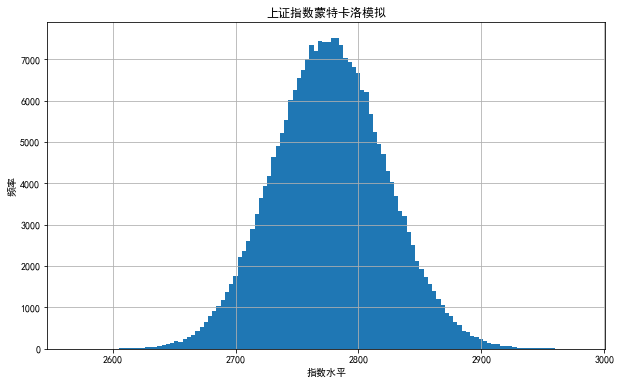

In [23]:
plt.figure(figsize=(10,6))
plt.hist(S[-1], bins=120)
plt.grid(True)
plt.xlabel('指数水平')
plt.ylabel('频率')
plt.title('上证指数蒙特卡洛模拟')
#Text(0.5,1,'上证指数蒙特卡洛模拟')